# DATA WRANGLING: CRIME RATES IN NYC

## Import packages and data

In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    sns.set_style("darkgrid")

    df = pd.read_csv('nyc_crime.csv')

## Clean data
- Delete unnecessary columns and fill NaN values of the columns that will be used for plots
- Convert all the date columns to datetime format. (I am still thinking of combining the date and time but I need to check what I can do to plot it.)
- Check for duplicates. check for columns .nunique() for columns for unique values 
- Separate the date and add another columns for years, months and dates

###  Delete unnecessary columns. 
Columns that are not needed are: `HADEVELOPT', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'HOUSING_PSA', 'PREM_TYP_DESC', 'JURISDICTION_CODE', 'JURIS_DESC', 'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'STATION_NAME', 'TRANSIT_DISTRICT`.



In [2]:
df.drop(['HADEVELOPT', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'HOUSING_PSA', 'PREM_TYP_DESC', 'JURISDICTION_CODE', 'JURIS_DESC', 'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'STATION_NAME', 'TRANSIT_DISTRICT'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460745 entries, 0 to 460744
Data columns (total 24 columns):
CMPLNT_NUM          460745 non-null int64
ADDR_PCT_CD         460745 non-null int64
BORO_NM             460430 non-null object
CMPLNT_FR_DT        460745 non-null object
CMPLNT_FR_TM        460745 non-null object
CRM_ATPT_CPTD_CD    460745 non-null object
KY_CD               460745 non-null int64
LAW_CAT_CD          460745 non-null object
OFNS_DESC           460733 non-null object
PATROL_BORO         460437 non-null object
PD_CD               460437 non-null float64
PD_DESC             460437 non-null object
RPT_DT              460745 non-null object
SUSP_AGE_GROUP      351550 non-null object
SUSP_RACE           351550 non-null object
SUSP_SEX            351550 non-null object
VIC_AGE_GROUP       460742 non-null object
VIC_RACE            460742 non-null object
VIC_SEX             460742 non-null object
X_COORD_CD          460745 non-null int64
Y_COORD_CD          460745 non-n

### Rename columns and fill in NaN values.

In [3]:
# Rename columns.
df = df.rename(columns={"BORO_NM": "BOROUGH", "CMPLNT_FR_DT": "DATE", "CMPLNT_FR_TM": "TIME", "LAW_CAT_CD": "OFFENSE LEVEL", "ADDR_PCT_CD": "PRECINT", "OFNS_DESC": "OFFENSE_NAME"})

# Fill in NaN values on BORO_NM
df["BOROUGH"].fillna("UNKNOWN", inplace = True) 
df.head()

,CMPLNT_NUM,PRECINT,BOROUGH,DATE,TIME,CRM_ATPT_CPTD_CD,KY_CD,OFFENSE LEVEL,OFFENSE_NAME,PATROL_BORO,...,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,12/31/19,18:00:00,COMPLETED,105,FELONY,ROBBERY,PATROL BORO BRONX,...,UNKNOWN,U,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,12/30/19,20:30:00,COMPLETED,341,MISDEMEANOR,PETIT LARCENY,PATROL BORO MAN NORTH,...,NaN,NaN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"
2,535744284,77,BROOKLYN,12/24/19,16:55:00,COMPLETED,106,FELONY,FELONY ASSAULT,PATROL BORO BKLYN NORTH,...,BLACK,M,18-24,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,52,BRONX,12/30/19,19:32:00,COMPLETED,341,MISDEMEANOR,PETIT LARCENY,PATROL BORO BRONX,...,WHITE,F,UNKNOWN,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
4,299841674,18,MANHATTAN,12/30/19,15:30:00,COMPLETED,341,MISDEMEANOR,PETIT LARCENY,PATROL BORO MAN SOUTH,...,NaN,NaN,25-44,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)"


In [4]:
df['KY_CD'][3]

341

### Change dates to datetime format.

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['RPT_DT'] = pd.to_datetime(df['RPT_DT'], errors='coerce')
df.head()

,CMPLNT_NUM,PRECINT,BOROUGH,DATE,TIME,CRM_ATPT_CPTD_CD,KY_CD,OFFENSE LEVEL,OFFENSE_NAME,PATROL_BORO,...,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,2019-12-31,18:00:00,COMPLETED,105,FELONY,ROBBERY,PATROL BORO BRONX,...,UNKNOWN,U,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,2019-12-30,20:30:00,COMPLETED,341,MISDEMEANOR,PETIT LARCENY,PATROL BORO MAN NORTH,...,NaN,NaN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"
2,535744284,77,BROOKLYN,2019-12-24,16:55:00,COMPLETED,106,FELONY,FELONY ASSAULT,PATROL BORO BKLYN NORTH,...,BLACK,M,18-24,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,52,BRONX,2019-12-30,19:32:00,COMPLETED,341,MISDEMEANOR,PETIT LARCENY,PATROL BORO BRONX,...,WHITE,F,UNKNOWN,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
4,299841674,18,MANHATTAN,2019-12-30,15:30:00,COMPLETED,341,MISDEMEANOR,PETIT LARCENY,PATROL BORO MAN SOUTH,...,NaN,NaN,25-44,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)"


### Add columns for day, month, year and sort by date.

In [6]:
# Add Columns for Hour, Day, Weekday, Month, Year
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

#Sort By Date in descending order
df = df.sort_values('DATE')
df.head()

,CMPLNT_NUM,PRECINT,BOROUGH,DATE,TIME,CRM_ATPT_CPTD_CD,KY_CD,OFFENSE LEVEL,OFFENSE_NAME,PATROL_BORO,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
125688,863566396,100,QUEENS,2015-01-01,0:00:00,COMPLETED,126,FELONY,MISCELLANEOUS PENAL LAW,PATROL BORO QUEENS SOUTH,...,WHITE,M,1035212,152992,40.586466,-73.816522,"(40.58646552900007, -73.81652172299994)",2015,1,1
436147,780908649,42,BRONX,2015-01-01,0:00:00,COMPLETED,116,FELONY,SEX CRIMES,PATROL BORO BRONX,...,BLACK HISPANIC,F,1008798,238971,40.822570,-73.911307,"(40.82256991600008, -73.91130716899994)",2015,1,1
312163,996127336,50,BRONX,2015-01-01,0:00:00,COMPLETED,233,MISDEMEANOR,SEX CRIMES,PATROL BORO BRONX,...,WHITE HISPANIC,F,1011257,261130,40.883383,-73.902333,"(40.883382579000056, -73.90233330899997)",2015,1,1
311798,160752445,18,MANHATTAN,2015-01-01,0:00:00,COMPLETED,578,VIOLATION,HARRASSMENT 2,PATROL BORO MAN SOUTH,...,WHITE,F,987959,217674,40.764149,-73.986612,"(40.76414872600003, -73.98661223299997)",2015,1,1
360886,990576089,66,BROOKLYN,2015-01-01,0:01:00,COMPLETED,109,FELONY,GRAND LARCENY,PATROL BORO BKLYN SOUTH,...,WHITE,F,985162,169652,40.632340,-73.996716,"(40.63234026100001, -73.99671569099996)",2015,1,1


### Check that each value for `COMPLAINT NUM` is unique.

In [7]:
# Check that each COMPLAINT NUM is unique
CN_unique = df['CMPLNT_NUM'].nunique()
CN_unique == len(df)

True

## Plotting total crimes each year in Queens

I will plot the total crimes each year in Queens to peek at the data and see if there are any abnormalities

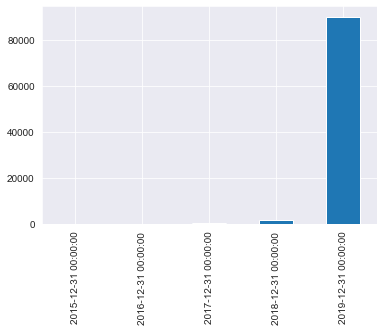

In [8]:
# Plot Queens Crime Frequency by Date 

# Create a subset dataframe by combining columns
date_boro_df = df[['DATE', 'BOROUGH']]

# Filter dataframe
queens = date_boro_df[date_boro_df['BOROUGH'] == 'QUEENS']

# Count the sum of occurences for each date
queens_dates = queens.DATE.value_counts()

# Use resample to organize it into Yearly sums
queens_count = queens_dates.resample(rule='Y').apply('sum')
queens_count

#Plot 
queens_count.plot(kind='bar')

There are fewer recorded crimes from 2015 to 2018 because NYC OpenData and NYPD Database did not merge until 2017. Because of this, there are way fewer data in those years that it will make our graphs different since it will consider years 2015 to 2018 as outliers of 2019.

## For better data, we will now focus only on crime records in 2019.

### Filter only 2019 dates from `df`

In [9]:
df = df[df['DATE'].dt.year == 2019]
df.head()

,CMPLNT_NUM,PRECINT,BOROUGH,DATE,TIME,CRM_ATPT_CPTD_CD,KY_CD,OFFENSE LEVEL,OFFENSE_NAME,PATROL_BORO,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
460182,900735981,105,QUEENS,2019-01-01,15:00:00,COMPLETED,578,VIOLATION,HARRASSMENT 2,PATROL BORO QUEENS SOUTH,...,ASIAN / PACIFIC ISLANDER,F,1056264,205572,40.730639,-73.740167,"(40.730639403000055, -73.74016656399994)",2019,1,1
460184,495588128,44,BRONX,2019-01-01,18:35:00,COMPLETED,121,FELONY,CRIMINAL MISCHIEF & RELATED OF,PATROL BORO BRONX,...,UNKNOWN,E,1004749,240880,40.827820,-73.925931,"(40.827819901000055, -73.92593075599996)",2019,1,1
455749,876271073,88,BROOKLYN,2019-01-01,1:00:00,COMPLETED,109,FELONY,GRAND LARCENY,PATROL BORO BKLYN NORTH,...,WHITE,F,990026,189746,40.687492,-73.979174,"(40.687492038000066, -73.97917448199998)",2019,1,1
449662,394629573,44,BRONX,2019-01-01,15:15:00,COMPLETED,121,FELONY,CRIMINAL MISCHIEF & RELATED OF,PATROL BORO BRONX,...,UNKNOWN,E,1004749,240880,40.827820,-73.925931,"(40.827819901000055, -73.92593075599996)",2019,1,1
460185,579035297,18,MANHATTAN,2019-01-01,2:10:00,COMPLETED,106,FELONY,FELONY ASSAULT,PATROL BORO MAN SOUTH,...,WHITE HISPANIC,M,987374,217550,40.763809,-73.988724,"(40.763808604000076, -73.98872409799998)",2019,1,1


# DATA STORYTELLING: CRIME RATES IN NYC

The purpose of this project is to be able to understand the nature of crimes that happen in NYC in each borough. Various crimes could be confined to different boroughs. 

I performed some data exploration and visualization in this notebook with the hope of uncovering some interesting insights along the way. I used publicly available data to explore crime in NYC from January 2019 to December 2019. The data is available from the NYC's data portal linked below.

https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/data

Though the original audience is the NYPD cops and detectives, the audience could be any New York City's resident with minimum knowledge of the technicalities of the code cells. There are comment in each cell codes to explain what steps I took to obtain the results.

## Display amount of Crimes per borough in the data set

BROOKLYN         129370
MANHATTAN        113650
BRONX             99002
QUEENS            90147
STATEN ISLAND     18510
UNKNOWN             299
Name: BOROUGH, dtype: int64

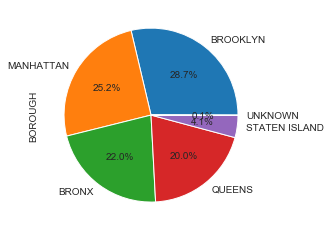

In [10]:
borough_count = df.BOROUGH.value_counts()
borough_count.plot(kind='pie', y = 'BOROUGH', shadow=False,autopct='%1.1f%%', legend = False)
borough_count

We counted the ratio of crimes in each borough to the total crimes reported and did a pie plot. Brooklyn had the highest reported crimes but it was not too far of a difference from Manhattan, Bronx and Queens.

## Plot frequency of crimes for each borough in 2019
I want to see the trend of crimes reported every month in each borough. Is there peak season for crimes? When is the crime reported lowest? To see the bigger picture, I made time series plot for all the boroughs in each month.

In [11]:
# create subset df
boro_2019 = df[['MONTH', 'BOROUGH']]
boro_2019 = boro_2019[boro_2019.BOROUGH != 'UNKNOWN']
boro_2019

,MONTH,BOROUGH
460182,1,QUEENS
460184,1,BRONX
455749,1,BROOKLYN
449662,1,BRONX
460185,1,MANHATTAN
...,...,...
6890,12,BROOKLYN
2552,12,BRONX
6880,12,BROOKLYN
10995,12,STATEN ISLAND


### Plot the frequency of crimes reported in all boroughs in one graph.

In [12]:
# use unstack() to create the dataframe of crimes for each borough per month
#Grouping
month_boro = boro_2019.groupby(['MONTH','BOROUGH'])
crimes_per_borough = month_boro["MONTH"].count().unstack()
crimes_per_borough

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
MONTH,,,,,
1,7874,10600,8823,7016,1506
2,6956,9160,7889,6387,1355
3,7987,10500,8996,7308,1477
4,7979,10436,9228,7086,1499
5,8817,11516,9953,8046,1674
6,8477,11383,10163,7991,1665
7,9331,12108,10392,8461,1721
8,9017,11566,10292,8191,1548
9,8694,11499,10198,7767,1691


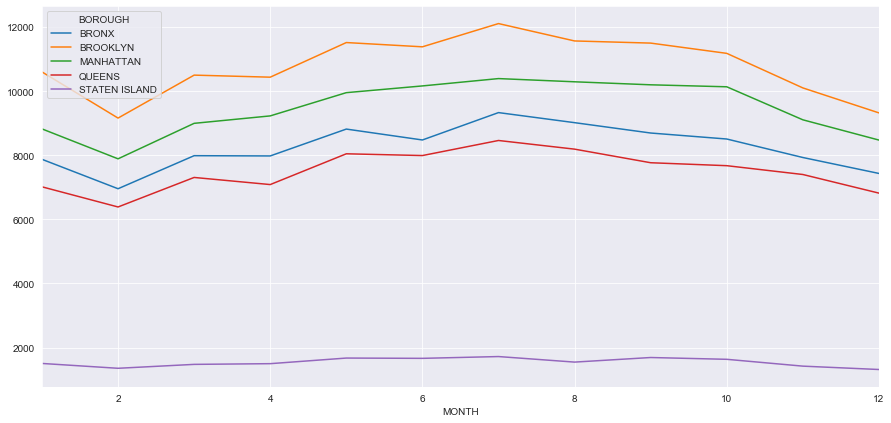

In [13]:
# Plot the df
fig, ax = plt.subplots(figsize=(15,7))
crimes_per_borough.plot(ax=ax)

The trends of crimes reported are similar and consistent throughout the year for each borough. Brooklyn has been consistently on top. For more details, I made the time series plots of each borough.

### Plot time series of Bronx in 2019

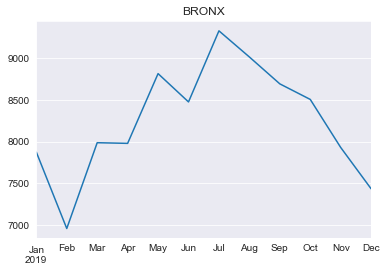

In [14]:
#create subset df with only 2 columns
boro_2019 = df[['DATE', 'BOROUGH', 'MONTH']]

boro_2019 = boro_2019[boro_2019.BOROUGH != 'UNKNOWN']

#Create the filter
bronx = boro_2019[boro_2019['BOROUGH'] == 'BRONX']

# Count the sum of occurences for each date
bronx = bronx.DATE.value_counts()

# Use resample to organize it into monthly sums
bronx = bronx.resample(rule='M').apply('sum')

# Plot
bronx.plot(kind='line', title = "BRONX")


### Plot Manhattan in 2019

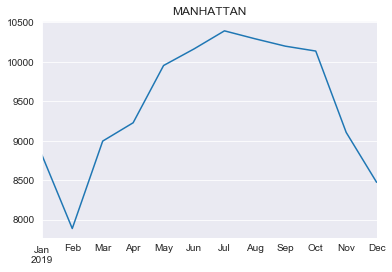

In [15]:
manhattan = boro_2019[boro_2019['BOROUGH'] == 'MANHATTAN']
manhattan = manhattan.DATE.value_counts()
manhattan = manhattan.resample(rule='M').apply('sum')
manhattan.plot(kind='line', title="MANHATTAN")

### Plot Queens in 2019

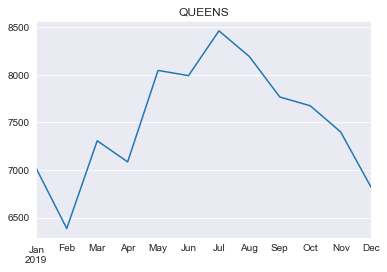

In [16]:
queens = boro_2019[boro_2019['BOROUGH'] == 'QUEENS']
queens = queens.DATE.value_counts()
queens = queens.resample(rule='M').apply('sum')
queens.plot(kind='line', title="QUEENS")

### Plot Staten Island in 2019

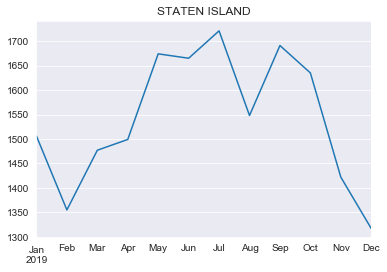

In [17]:
staten_island = boro_2019[boro_2019['BOROUGH'] == 'STATEN ISLAND']
staten_island = staten_island.DATE.value_counts()
staten_island = staten_island.resample(rule='M').apply('sum')
staten_island.plot(kind='line', title="STATEN ISLAND")

All boroughs have a noticeable drop rate in February. Summer seems to be the peak season for crimes, starting in May and the highest and dropping starts in October. The highest crime reported happened in July and lowest are February and December.

## Make a Stacked Bar Graph of Crimes per Borough in 2019
I want to visualize the distibution of crimes reported in each borough per month.

<bound method DataFrame.info of BOROUGH  BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
MONTH                                                     
1         7874     10600       8823    7016           1506
2         6956      9160       7889    6387           1355
3         7987     10500       8996    7308           1477
4         7979     10436       9228    7086           1499
5         8817     11516       9953    8046           1674
6         8477     11383      10163    7991           1665
7         9331     12108      10392    8461           1721
8         9017     11566      10292    8191           1548
9         8694     11499      10198    7767           1691
10        8507     11179      10136    7675           1635
11        7930     10101       9106    7400           1422
12        7433      9322       8474    6819           1317>

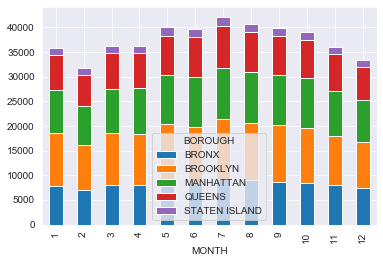

In [18]:
df2 = boro_2019.groupby(['MONTH', 'BOROUGH'])['MONTH'].count().unstack('BOROUGH').fillna(0)
df2.plot(kind='bar',legend="best", stacked=True)
df2.info

## Get the frequency of top 10 districts with most crimes.
NYC is one of the most densely populated cities in the US so no doubt, crimes are reported in all parts of NYC. Now that we have the crime data for each borough, I want to break it down and see the top 10 districts with the most crimes reported.

In [19]:
# Get the top 10 districts with highest frequencies of crimes reported
district = df.PRECINT.value_counts().head(10)

# Sort in descending order
district = district[::-1]
district

67     8600
73     9019
43     9315
46     9402
47     9476
14     9547
52     9717
44    11447
40    12826
75    13947
Name: PRECINT, dtype: int64

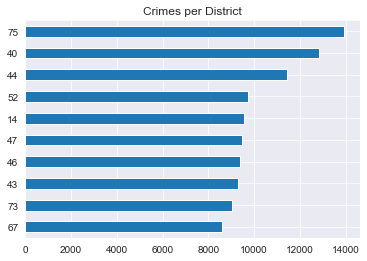

In [20]:
# Plot using horizontal bar chart
district.plot(kind='barh', title="Crimes per District")

The top district with most crimes is Disrict 75 in Manhattan, and the following districts are in Brooklyn.

## Make a Map of Total Crimes per District in 2019
To visualize the crime data per district, we can use `sns.lmplot` to make the scatter plot of crimes reported per district. Just to clarify, this is not the exact map of NYC. This is a scatter plot based on the exact location of the occurence of the crime reported per X and Y coordinate of the crime data. There might be parts of NYC that is not dotted here since no crime was reported.

Text(0.5, 1, 'ALL CRIMES REPORTED PER DISTRICT 2019')

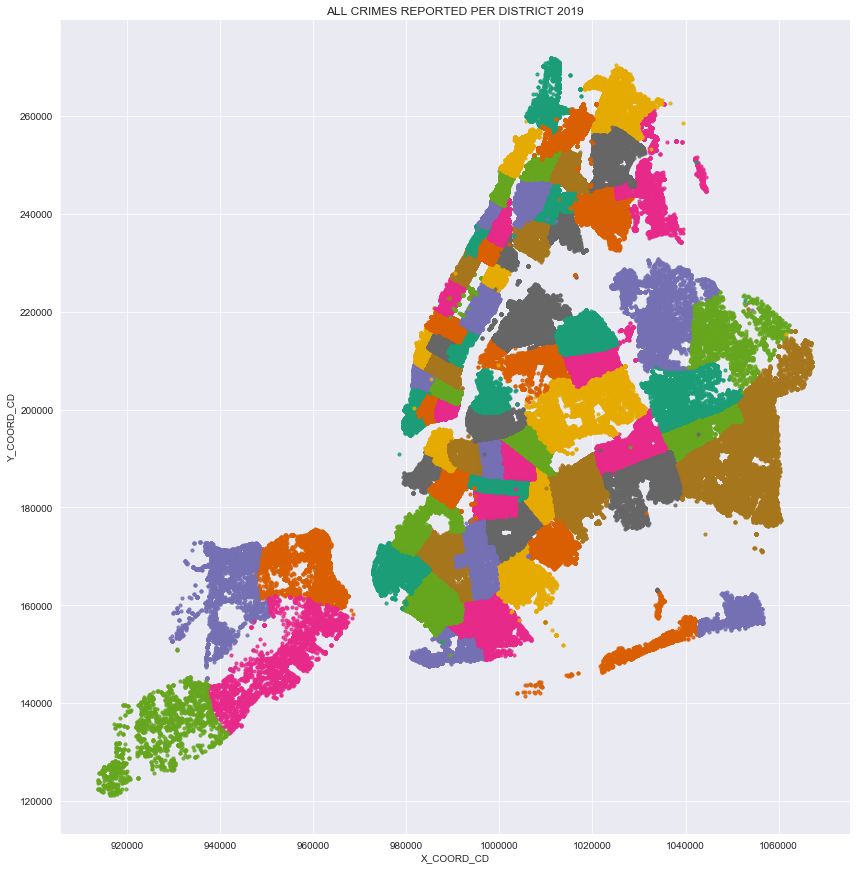

In [21]:
df_coord = df.loc[(df['X_COORD_CD']!=0)]

sns.lmplot('X_COORD_CD',
           'Y_COORD_CD',
           data=df_coord,
           fit_reg=False, 
           hue="PRECINT", 
           palette='Dark2',
           height=12,
           ci=2,
           legend=False,
           scatter_kws={"marker": "D", 
                        "s": 10}) 
ax = plt.gca()
ax.set_title("ALL CRIMES REPORTED PER DISTRICT 2019")

## Group all crimes into each category

# HI SPRINGBOARD! THIS IS THE CELL THAT I INITIATED

In [22]:
# top_10_crimes = df.OFFENSE_NAME.value_counts().head(5).index.tolist()

# Get a list of all crimes
all_crimes = df.OFFENSE_NAME.fillna("UNKNOWN").tolist()

# Get all Offense Names containing "HARASSMENT"
result = []
for key in all_crimes:
    if "HARASSMENT" in key and key not in result:
        result.append(key)
result

[]

In [23]:
# Filter the dataframe using the list of Offense Names containing HARASSMENT
# Get all rows containing "HARASSMENT"
harassment = df.loc[df['OFFENSE_NAME'].isin(result)].copy()
harassment['OFFENSE_NAME'] = "HARASSMENT"
harassment['OFFENSE_NAME']
# pp = df.loc[df['OFFENSE_NAME'].isin(result),'OFFENSE_NAME']


Series([], Name: OFFENSE_NAME, dtype: object)

In [24]:
harassment = df.loc[df['OFFENSE_NAME'].isin(result)].copy()
harassment['OFFENSE_NAME'] = "HARASSMENT"
harassment['OFFENSE_NAME']

Series([], Name: OFFENSE_NAME, dtype: object)

## Make a map of the most frequent crime in each district

In [25]:
# TODO: Kernel Dies here
# Implementing first solution from http://stackoverflow.com/questions/45161355/pandas-dataframe-find-the-max-after-groupby-two-columns-and-gaet-counts
top_crime_in_districts = df.groupby(['PRECINT', 'OFFENSE_NAME'], as_index=False)['CMPLNT_NUM'].count()
top_crime_in_districts

,PRECINT,OFFENSE_NAME,CMPLNT_NUM
0,1,ADMINISTRATIVE CODE,5
1,1,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,1
2,1,ARSON,1
3,1,ASSAULT 3 & RELATED OFFENSES,446
4,1,BURGLAR'S TOOLS,13
...,...,...,...
2924,123,ROBBERY,12
2925,123,SEX CRIMES,18
2926,123,THEFT-FRAUD,49
2927,123,UNAUTHORIZED USE OF A VEHICLE,7


In [26]:
precincts = top_crime_in_districts.groupby('PRECINT')
list(precincts)

[(1,     PRECINT                          OFFENSE_NAME  CMPLNT_NUM
  0         1                   ADMINISTRATIVE CODE           5
  1         1  AGRICULTURE & MRKTS LAW-UNCLASSIFIED           1
  2         1                                 ARSON           1
  3         1          ASSAULT 3 & RELATED OFFENSES         446
  4         1                       BURGLAR'S TOOLS          13
  5         1                              BURGLARY         128
  6         1        CRIMINAL MISCHIEF & RELATED OF         486
  7         1                     CRIMINAL TRESPASS          36
  8         1                       DANGEROUS DRUGS          40
  9         1                     DANGEROUS WEAPONS          26
  10        1                              ESCAPE 3           1
  11        1                        FELONY ASSAULT          95
  12        1                               FORGERY          54
  13        1                                FRAUDS          64
  14        1                  FRAUDU

In [27]:
def getMostFrequentCrimeInPrecinct(group): 
    column = group.OFNS_DESC
    row = group.CMPLNT_NUM.idxmax()
    most_freq = column[row]
    return most_freq

# Using Function
# result = precincts.apply(getMostFrequentCrimeInPrecinct)

# Using Lambda
# result = precincts.apply(lambda group: column[row])
# In a groupby you have a bunch of groups. `groupby.apply()` takes each group in a groupby and applies some function to it.

result = precincts.apply(lambda group: group.OFFENSE_NAME[group.CMPLNT_NUM.idxmax()])

In [28]:
# Print most frequent crime in each precinct
result.to_frame()

,0
PRECINT,
1,PETIT LARCENY
5,PETIT LARCENY
6,PETIT LARCENY
7,PETIT LARCENY
9,PETIT LARCENY
...,...
115,PETIT LARCENY
120,HARRASSMENT 2
121,PETIT LARCENY


## Plot the frequency of top 10 crimes committed
I want to see the nature of crimes being reported by plotting the top 10 most frequent crime reported.

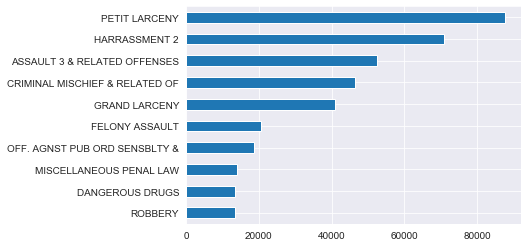

In [29]:
# Get the top 10 crime types with high frequency
top_10_crimes = df.OFFENSE_NAME.value_counts().head(10)

# Sort in descending order
top_10_crimes= top_10_crimes[::-1]

# Plot using horizontal bar chart
top_10_crimes.plot(kind='barh')

There is a mix of violent and non violent crimes reported. Harrassment 3, 4, 5 and Assault are leading. They are both violent crimes followed by larceny. Studies have shown that victims will most likely report a crime if it is violent and theft/larceny.

## Make a bar graph of Felony vs Misdemeanor vs Violation
I would like to see the offense level of crimes reported each month. I used unstacked bar graph to see the trends in each offense level.

Text(0.5, 1.0, 'FELONY VS MISDEMEANOR VS VIOLATION')

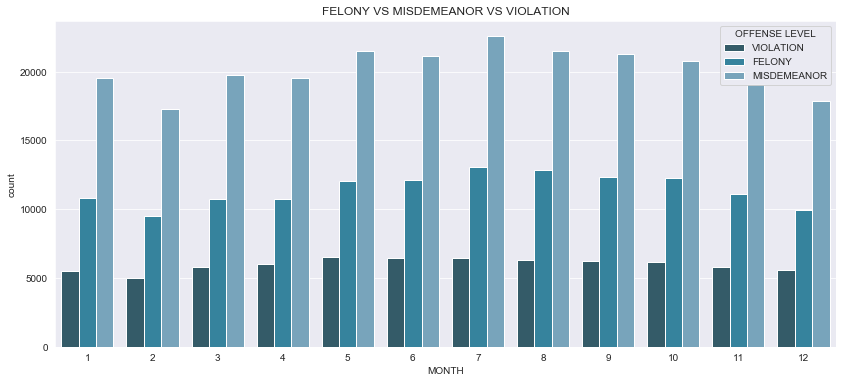

In [30]:
# Plot the offense level occurence in each month
fig, ax = plt.subplots(figsize=(14,6))
crime_lvl = df[['MONTH','OFFENSE LEVEL']]
ax = sns.countplot(x="MONTH",
                   hue='OFFENSE LEVEL',
                   data=crime_lvl,
                   palette="PuBuGn_d")
plt.title('FELONY VS MISDEMEANOR VS VIOLATION')

Looks like Misdemeanor is the top offense category of the crimes in NYC. This also makes sense considering Harrassment 3,4,5 is the most occuring crime type. This is better than having the majority of the crimes be felonies. 

You can see a general trend in the data, where as Misdeameanors increase and decrease, so do Felonies and Violations. This also relates back to the Time-Series plots we made for total crimes reported each month. 

## Make a Stacked Bar Graph of Top 5 Crimes in 2019
I would like to see the distribution of crimes reported each month but due to various of crime being reported, it will be huge data to plot. We can cee this minute scale by plotting only the top 5 most crimes reported each month.

In [31]:
#Filter df only where rows are the top 10 crimes using .loc  
top_10_crimes = df.OFFENSE_NAME.value_counts().head(5).index.tolist()
df2 = df.loc[df['OFFENSE_NAME'].isin(top_10_crimes)]


df2 = df2.groupby(['MONTH', 'OFFENSE_NAME'])['MONTH'].count().unstack()
df2.head()

OFFENSE_NAME,ASSAULT 3 & RELATED OFFENSES,CRIMINAL MISCHIEF & RELATED OF,GRAND LARCENY,HARRASSMENT 2,PETIT LARCENY
MONTH,,,,,
1,3899,3999,3200,5415,6603
2,3633,3231,2771,4941,5872
3,4231,3950,3118,5745,6509
4,4285,3578,3137,5940,6788
5,5078,4090,3528,6440,7290


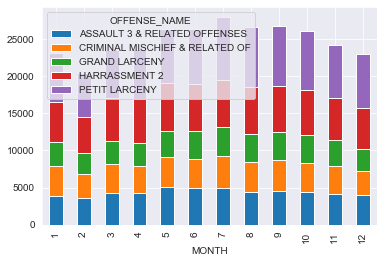

In [32]:
# Plot Stacked Bar Graph
df2.plot(kind='bar',legend="best", stacked=True)

## Conclusion

I used data compiled by the New York police department to extract some insights on crimes reported in New York Metropolitan Area. While the data analysis performed here is devoid of a national perspective my key findings can be distilled to a few key points below:

- Brooklyn has the highest crime reported with 29% of total reports. That makes sense since Brooklyn is the most populated borough according to (https://guides.lib.jjay.cuny.edu/c.php?g=288385&p=1922495).

- The trends of the crime reports in all boroughs are consistent throughout the year. All boroughs have the same months of high and low reports. No overlapping of data trends had occurred.

- Brooklyn as being the one with the highest reports is also consistent to be the highest portion in overall's monthly total in 2019.

- Interestingly, District 75 in Brooklyn as the highest district with most crimes reported followed by District 40, 44 and 52 which are in the Bronx. Manhattan has the second-highest reports overall.

- All districts in NYC have crimes reported.

- The top 10 most crimes reported include harassment, assault, and theft.

- The most frequent offense level of all crimes reported is a misdemeanor and the general trend of felonies and violations follows it throughout the whole year.

- During hot weather, reports are more frequent compared to the cold season. Reports drop drastically as holidays approached.

While these observations are illuminating, I should mention that they don't paint the whole picture and comparisons should be made with national or other comparable data including crime data from other cities to give more perspective. We don't know if the total crime reports are within the national average or too high. Such comparisons would help us build more compelling arguments in our data storytelling by using them to support our local findings.

With that being said, our findings are still very relevant to the new detectives and residents of NYC for local decision making on how to lessen the crime reports in each borough. 